In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [60]:
df.shape

(200, 5)

In [61]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [63]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [64]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

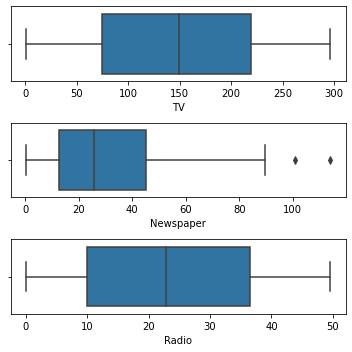

In [66]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt1=sns.boxplot(df['Newspaper'],ax=axs[1])
plt1=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

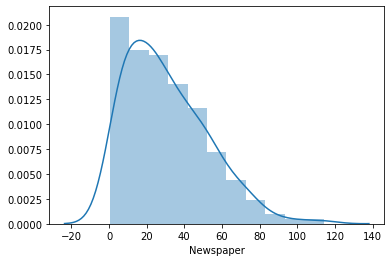

In [67]:
sns.distplot(df['Newspaper'])

In [68]:
iqr=df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [69]:
lower_bridge=df["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [70]:
data=df.copy()

In [71]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

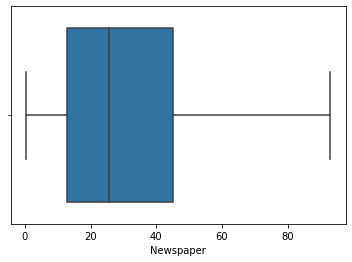

In [72]:
sns.boxplot(data["Newspaper"])

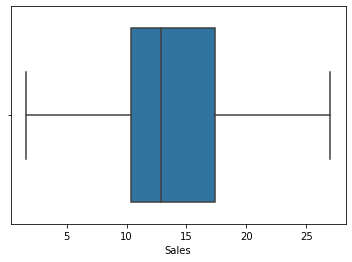

In [73]:
sns.boxplot(data['Sales'])

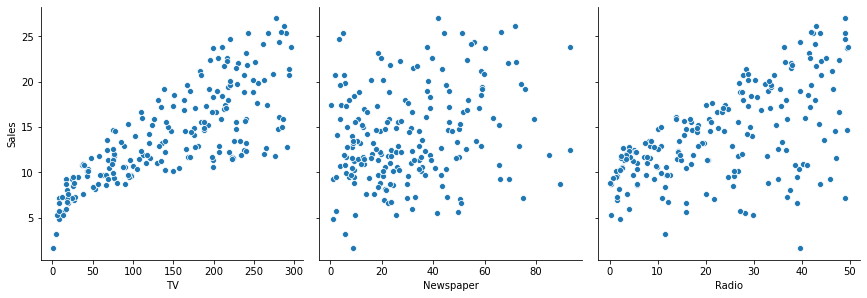

In [74]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

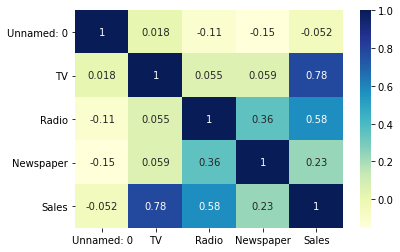

In [75]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [76]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [77]:
print(important_features)

['TV', 'Radio', 'Sales']


In [78]:
x=data['TV']
y=data['Sales']

In [79]:
x=x.values.reshape(-1,1)

In [80]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [81]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [82]:
print(x.shape,y.shape)

(200, 1) (200,)


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [84]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [85]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [86]:


# Assuming you have your training data and labels stored in x_train and y_train respectively
knn = KNeighborsRegressor().fit(x_train, y_train)
knn



KNeighborsRegressor()

In [87]:
knn_train_pred=knn.predict(x_train)

In [88]:
knn_test_pred=knn.predict(x_test)

In [89]:
print(knn_train_pred,knn_test_pred)

[20.16 16.26 19.38  7.04  9.54 12.24 16.62 12.24  8.64 14.02  7.04  8.64
 20.38 12.24 19.96 10.96 10.12 16.06 11.44 11.28  4.8   8.64  4.8   9.42
 16.62 16.16 18.1   9.94 10.74 15.04  7.04  9.92 15.3   7.72 19.98 18.26
  5.54 15.28  8.64 18.54 20.38 11.06 12.24 19.18  9.94 14.02 16.4  11.06
 14.68 10.7   6.7  18.1  19.5   7.72 16.98 19.7  13.78 16.18 19.16  9.58
 10.56 10.74 11.44 19.16 14.2  16.16 19.98 20.98 11.06 16.98  9.72 16.64
 14.2  16.48 10.56 18.26 10.6  18.16 10.56 15.2  15.7  16.18 21.66  9.76
 20.16 15.36 19.18 21.44 10.96  9.9  19.98 15.94 15.7   8.64 16.48 16.18
 14.08 15.86 19.98 15.6  18.16 20.16 18.54 15.6  15.04  4.8  14.68 20.62
 21.56 16.9  10.6  14.88  7.38 18.54 19.18  7.24 14.08  7.72 15.6  11.28
 20.   16.26 19.98  7.24 15.76 14.08 17.72 14.2  14.1  16.64 19.38  9.8
 19.16 11.44] [10.96 18.3  19.38 17.72 19.98 19.7  14.68 19.5  13.86 16.22 12.24  8.7
 14.68 20.16 11.42  8.64 14.02 18.34 15.04  5.54 10.4   7.04  6.02 16.16
 15.76 15.76 16.44 14.4   9.54 15.86 13

In [90]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [91]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"k-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE",rmse)

R2: 0.5406624885241389
RMSE 3.193136578995833


In [92]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,k-Nearest Neighbors,0.654328,0.540662,3.193137,0.113665


In [95]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [97]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [98]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine ","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE",rmse)

R2: 0.5726807431151624
RMSE 3.07983727214938


In [99]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,k-Nearest Neighbors,0.654328,0.540662,3.193137,0.113665
1,Support Vector Machine,0.583401,0.572681,3.079837,0.010721


In [100]:
import statsmodels.api as sm

In [101]:
x_train_constant=sm.add_constant(x_train)

In [102]:
model=sm.OLS(y_train,x_train_constant).fit()

In [103]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     212.9
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.61e-29
Time:                        15:00:21   Log-Likelihood:                -352.44
No. Observations:                 134   AIC:                             708.9
Df Residuals:                     132   BIC:                             714.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1996      0.558     12.896      0.0

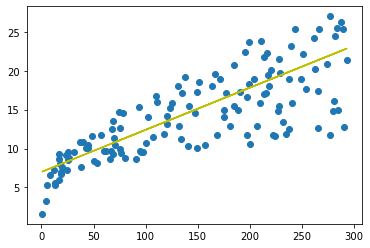

In [104]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [106]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

98     4.263897
97    -0.594537
92     1.727568
121   -1.104040
6      1.834236
         ...   
193    4.376191
20     0.293894
38     0.826971
198    4.657347
29    -0.095959
Name: Sales, Length: 134, dtype: float64

In [107]:
y_train_pred

array([21.13610274, 16.09453706, 17.67243166,  8.1040403 ,  9.96576351,
       10.83168128, 18.16792905, 10.79319604,  8.48889265, 12.4817357 ,
        8.14252554,  8.40230087, 17.47038418, 10.87497717, 20.36639805,
       11.87559326,  9.52318332, 15.89730023, 10.52861006, 10.49012483,
        7.23331188,  8.4311648 ,  7.45941263,  8.7149934 , 18.12944381,
       17.89853241, 20.51071768,  9.03730723, 10.37947978, 13.53526898,
        8.09922965,  9.77333734, 13.24662972,  8.02706984, 19.95749244,
       17.34049651,  7.57486833, 18.48062158,  8.40711152, 16.70549015,
       17.46557352, 12.14017924, 10.81243866, 18.74039691,  9.09984574,
       12.52503158, 18.36516587, 10.96156894, 13.94898525, 12.02953419,
        7.76248385, 20.52033899, 17.56178661,  8.02706984, 18.24008886,
       17.62913577, 12.36627999, 16.76802865, 20.70314385, 10.06678725,
       11.54846877, 10.41796501, 10.51898875, 20.73681843, 14.48777853,
       17.80712998, 20.03927356, 21.035079  , 11.05778203, 18.18

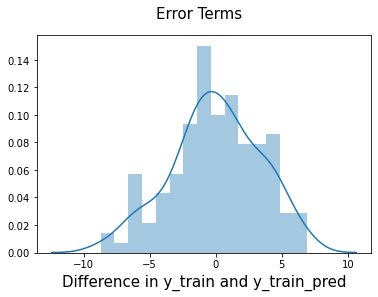

In [110]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle("Error Terms",fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()
           
           

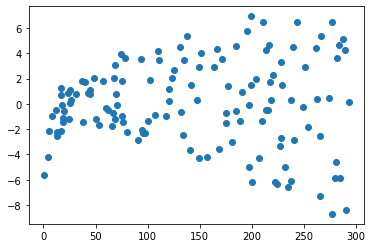

In [111]:
plt.scatter(x_train,res)
plt.show()

In [113]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [114]:
y_pred

array([11.89002522, 17.7734554 , 17.71091689, 17.14807034, 19.84684739,
       17.60989315, 13.90087871, 17.52811203, 12.63086598, 15.98389201,
       10.82205997,  8.57548442, 13.91050001, 21.32371825, 10.73065754,
        8.52256723, 12.4817357 , 16.51787463, 13.42462393,  7.60373226,
       11.44744503,  8.13290423,  7.61816422, 17.89853241, 15.16608078,
       15.11316358, 17.06147857, 12.77999626,  9.903225  , 15.38737088,
       12.23158167, 10.87497717, 16.49382136, 15.05543573, 18.73558625,
       18.71153298, 16.23404603, 19.14930252, 13.75174842, 20.95810853,
       11.39452783, 11.32236801, 18.26895279, 18.75001822, 10.87016651,
       13.89606805, 11.82748671, 14.07406226, 19.48604832,  9.26821864,
       16.94121221, 18.06209465, 15.71449537, 16.81132454, 17.33568586,
       21.45841657, 11.51479419,  7.55081506, 17.79750867, 18.65861578,
        7.61335357, 18.82698868,  9.02768593, 13.02052897, 16.23885668,
       15.49801593])

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [116]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.0278501878880437

In [117]:
r2=r2_score(y_test,y_pred)
r2

0.5869851280716015

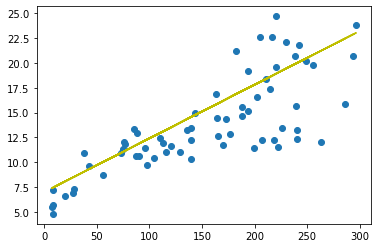

In [118]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()